In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv")
df

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


Visualizzare la popolazione complessiva di tutte le regioni


In [4]:
df["totale_popolazione"].sum()

54009944

Visualizzare la popolazione di una regione inserita dall’utente. Controllare il dato inserito: se la regione non esiste dare un opportuno messaggio, altrimenti dare il messaggio “La regione (nome) ha (totale) abitanti”


In [5]:
regione = input("Inserire la regione: ")
popolazione = df[df["nome_area"] == regione].totale_popolazione.sum()#["totale_popolazione"]
if popolazione > 0:
  print("La regione", regione, "ha", popolazione, "abitanti")
else:
  print("Regione non presente")

Inserire la regione: Lombardia
La regione Lombardia ha 9246804 abitanti


Visualizzare la popolazione di ogni regione. Visualizzare il nome della regione e il numero di abitanti. Ordinare in ordine decrescente sul numero di abitanti (dalla regione che ha più abitanti a quella che ne ha di meno)


In [23]:
df2 = df.groupby("nome_area")["totale_popolazione"].sum().sort_values(ascending = False).reset_index()
df2

,nome_area,totale_popolazione
0,Lombardia,9246804
1,Lazio,5147533
2,Campania,5104347
3,Sicilia,4435335
4,Veneto,4383999
5,Emilia-Romagna,3998406
6,Piemonte,3927641
7,Puglia,3572053
8,Toscana,3360763
9,Calabria,1689716


Visualizzare il grafico a barre orizzontali relativo all’esercizio 3. Inserire il titolo, i nomi degli assi e la legenda. Fare in modo che i colori delle barre siano gradazioni dello stesso colore.


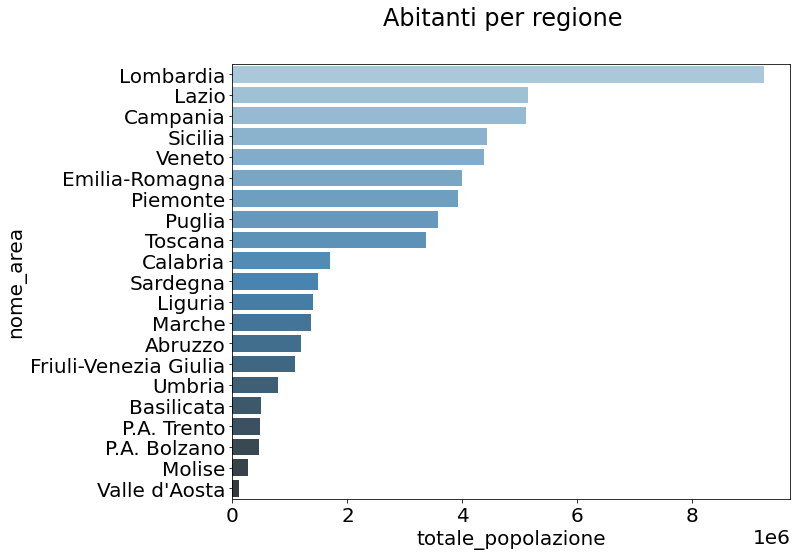

In [26]:
fig = plt.figure(figsize = (10,8))
ax = plt.axes()
fig.suptitle("Abitanti per regione")
ax.set_xlabel("Popolazione")
ax.set_ylabel("Regioni")
ax.barh(df2["nome_area"], df2["totale_popolazione"])
sns.barplot(x = df2["totale_popolazione"], y = df2["nome_area"], palette="Blues_d")
plt.show()

Eliminare la colonna ‘area’

In [8]:
df.drop(columns = "area", inplace = True)
df

,nome_area,fascia_anagrafica,totale_popolazione
0,Abruzzo,12-19,94727
1,Abruzzo,20-29,125230
2,Abruzzo,30-39,146965
3,Abruzzo,40-49,187162
4,Abruzzo,50-59,208686
...,...,...,...
163,Veneto,40-49,715790
164,Veneto,50-59,806474
165,Veneto,60-69,610635
166,Veneto,70-79,494721


Visualizzare le fasce anagrafiche che hanno un numero di persone compreso tra 5 e 7 milioni


In [9]:
df1 = df.groupby("fascia_anagrafica")["totale_popolazione"].sum().reset_index()
df1.loc[(df1["totale_popolazione"] >= 5000000) & (df1["totale_popolazione"] <= 7000000), ["fascia_anagrafica"]]

,fascia_anagrafica
1,20-29
2,30-39
6,70-79


In [10]:
df2 = df1.loc[(df1["totale_popolazione"] >= 5000000) & (df1["totale_popolazione"] <= 7000000)]
df2

,fascia_anagrafica,totale_popolazione
1,20-29,6013709
2,30-39,6794332
6,70-79,6019293


Visualizzare il grafico a torta dei dati dell’esercizio 6. Visualizzare negli spicchi sia il numero assoluto degli abitanti (ad esempio 4345767) sia la percentuale


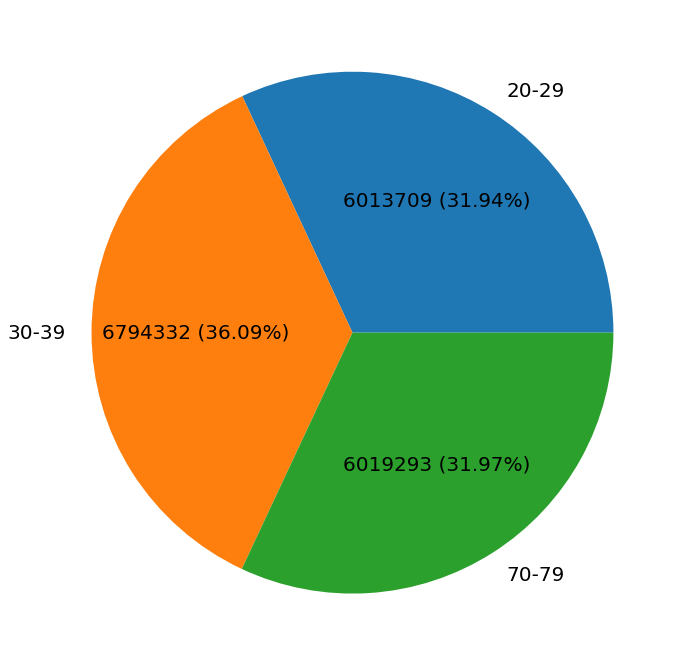

In [21]:
fig = plt.figure(figsize = (12,12))
ax = plt.axes()


def make_autopct(values):
  def my_autopct(pct):
    total=sum(values)
    val = int(round(pct*total/100.0))
    return '{v:d} ({p:.2f}%)'.format(p=pct, v=val)
  return my_autopct

values = list(df2["totale_popolazione"])
plt.rcParams.update({"font.size" : 20})

ax.pie(df2["totale_popolazione"], labels = df2["fascia_anagrafica"], autopct = make_autopct(values))
plt.show()

Visualizzare un nuovo grafico con i grafici precedenti. Il nuovo grafico deve avere due colonne e tre righe e deve contenere nella prima colonna tre volte il grafico a barre e nelle seconda colonna tre volte il grafico a torta


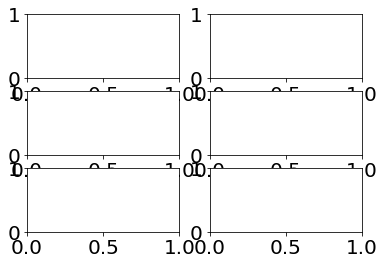

In [18]:
fig, ax = plt.subplots(3,2)
ax[0,0]

Salvare il grafico in un file .png


In [17]:
plt.savefig("output.png")

<Figure size 432x288 with 0 Axes>